<a href="https://colab.research.google.com/github/GabrielMS-cmd/Desafio_AluraStore/blob/main/Desafio_LojasAlura_byGabriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium


### Importação dos dados



In [ ]:

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
def faturamento(nome_loja):
  total = sum(nome_loja['Preço'])

  return total


faturamento_total_lojas = {'Loja 1': round(faturamento(loja), 2),
                     'Loja 2': round(faturamento(loja2), 2),
                     'Loja 3': round(faturamento(loja3), 2),
                     'Loja 4': round(faturamento(loja4), 2)}


In [ ]:
print('                        FATURAMENTO TOTAL POR LOJA\n')

tabela_faturamento = pd.DataFrame(faturamento_total_lojas,index=['Faturamento(R$)'])
tabela_faturamento

                        FATURAMENTO TOTAL POR LOJA



,Loja 1,Loja 2,Loja 3,Loja 4
Faturamento(R$),1534509.12,1488459.06,1464025.03,1384497.58


# 2. Vendas por Categoria


In [ ]:
def categorias(nome_loja):
  categoria_loja = nome_loja['Categoria do Produto'].value_counts()

  return categoria_loja


def vendas_categoria(categoria):

  categoria_vendas = {'moveis': categoria['moveis'],
                      'eletronicos': categoria['eletronicos'],
                      'brinquedos': categoria['brinquedos'],
                      'eletrodomesticos': categoria['eletrodomesticos'],
                      'esporte e lazer': categoria['esporte e lazer'],
                      'instrumentos musicais': categoria['instrumentos musicais'],
                      'livros': categoria['livros'],
                      'utilidades domesticas': categoria['utilidades domesticas']
                      }

  return categoria_vendas

dados_vendas_categoria = {'loja 1': vendas_categoria(categorias(loja)),
                          'loja 2': vendas_categoria(categorias(loja2)),
                          'loja 3': vendas_categoria(categorias(loja3)),
                          'loja 4': vendas_categoria(categorias(loja4))
                          }


In [ ]:
print('                  VENDAS POR CATEGORIA\n')
tabela_categorias = pd.DataFrame(dados_vendas_categoria)
tabela_categorias

                  VENDAS POR CATEGORIA

                       loja 1  loja 2  loja 3  loja 4
moveis                    465     442     499     480
eletronicos               448     422     451     451
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
utilidades domesticas     171     181     177     201


# 3. Média de Avaliação das Lojas

In [ ]:
def avaliacao_media(nome_loja):
  calculo = sum((nome_loja['Avaliação da compra'])) / len((nome_loja['Produto']))

  return calculo



avaliacoes = {'loja 1': round(avaliacao_media(loja), 2),
             'loja 2': round(avaliacao_media(loja), 2),
             'loja 3': round(avaliacao_media(loja), 2),
             'loja 4': round(avaliacao_media(loja), 2),
}



In [ ]:
print('              AVALIAÇÃO MÉDIA POR LOJA\n')
tabela_avaliacao = pd.DataFrame(avaliacoes, index=['Avaliação'])
tabela_avaliacao

              AVALIAÇÃO MÉDIA POR LOJA



,loja 1,loja 2,loja 3,loja 4
Avaliação,3.98,3.98,3.98,3.98


# 4. Produtos Mais e Menos Vendidos

In [ ]:

def vendas_produtos(dados, nome_loja):

  frequencia = dados['Produto'].value_counts()


  mais_vendido = frequencia.idxmax()
  qntd_mais = frequencia.max()

  menos_vendido = frequencia.idxmin()
  qntd_menos =  frequencia.min()


  return {'loja' : nome_loja,
          'mais_vendido': mais_vendido,
          'qntd_mais': qntd_mais,
          'menos_vendido': menos_vendido,
          'qntd_menos': qntd_menos
          }

produtos = [vendas_produtos(loja, 'loja 1'),
              vendas_produtos(loja2, 'loja 2'),
              vendas_produtos(loja3, 'loja 3'),
              vendas_produtos(loja4, 'loja 4')]




In [ ]:
print('                      Produtos mais e menos Vendidos\n')
tabela_produtos = pd.DataFrame(produtos)
tabela_produtos

                      Produtos mais e menos Vendidos



,loja,mais_vendido,qntd_mais,menos_vendido,qntd_menos
0,loja 1,Micro-ondas,60,Headset,33
1,loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
2,loja 3,Kit banquetas,57,Blocos de montar,35
3,loja 4,Cama box,62,Guitarra,33


# 5. Frete Médio por Loja

In [ ]:
def frete_medio(nome_loja):

  calculo = sum((nome_loja['Frete'])) / len((nome_loja['Produto']))

  return calculo


frete_total = {'loja 1': f'{frete_medio(loja):.2f}',
             'loja 2': f'{frete_medio(loja2):.2f}',
             'loja 3': f'{frete_medio(loja3):.2f}',
             'loja 4': f'{frete_medio(loja4):.2f}'
}


In [ ]:
print('              FRETE MÉDIO POR LOJA\n')
tabela_frete = pd.DataFrame(frete_total, index=['Frete(R$)'])
tabela_frete

              FRETE MÉDIO POR LOJA



,loja 1,loja 2,loja 3,loja 4
Frete(R$),34.69,33.62,33.07,31.28


# Gráficos


## Densidade de vendas por região

In [ ]:
import folium
from folium.plugins import HeatMap


# juntando os dados das lojas
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# criando o mapa
mapa = folium.Map(location=[todas_lojas['lat'].mean(), todas_lojas['lon'].mean()], zoom_start=12)

heat_data = list(zip(todas_lojas['lat'], todas_lojas['lon']))

HeatMap(heat_data).add_to(mapa)

mapa



## Vendas por Categoria

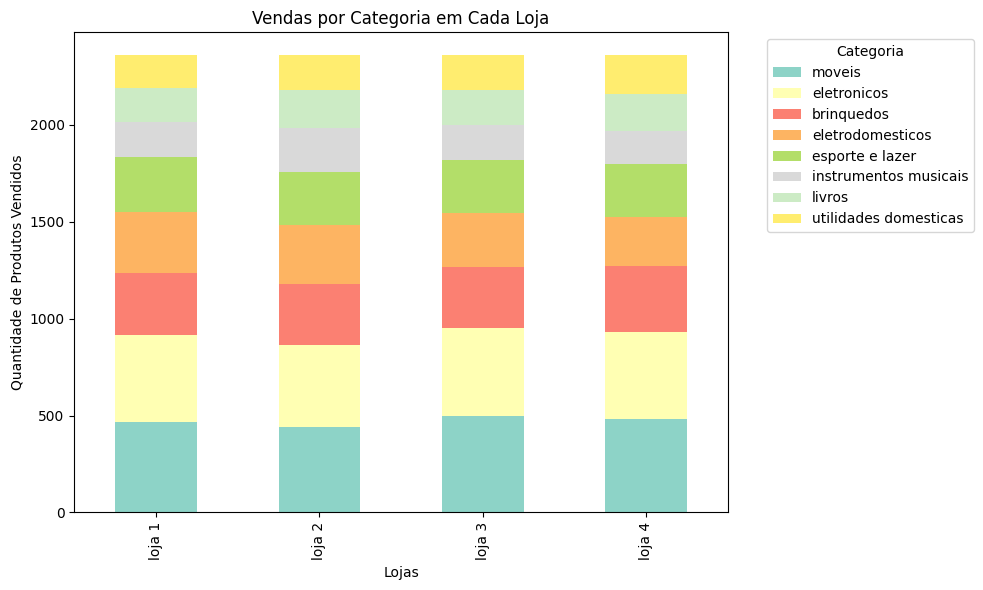

In [ ]:

# Coloca as lojas nas linhas e as categorias nas colunas
tabela_categorias = pd.DataFrame(dados_vendas_categoria)
tabela_categorias = tabela_categorias.T


tabela_categorias.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

plt.title('Vendas por Categoria em Cada Loja')
plt.xlabel('Lojas')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Faturamento Total

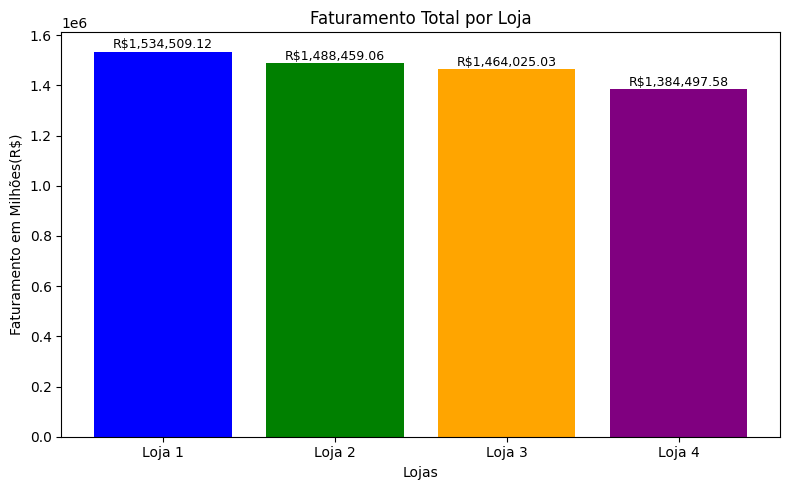

In [ ]:
lojas = list(faturamento_total_lojas.keys())
valores = [float(valor) for valor in faturamento_total_lojas.values()]

cores = ['blue', 'green', 'orange', 'purple']
plt.figure(figsize=(8, 5))
plt.bar(lojas, valores, color=cores)


plt.title('Faturamento Total por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento em Milhões(R$)')

for i, valor in enumerate(valores):
    plt.text(i, valor + 500, f'R${valor:,.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## Vendas por Produtos

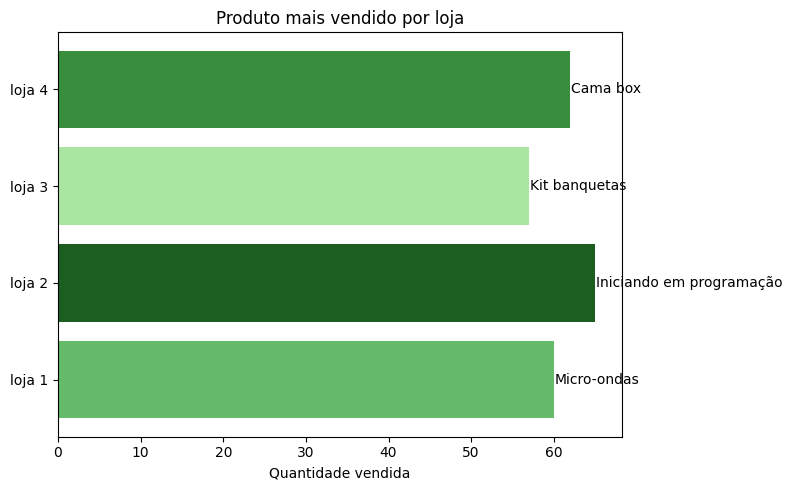

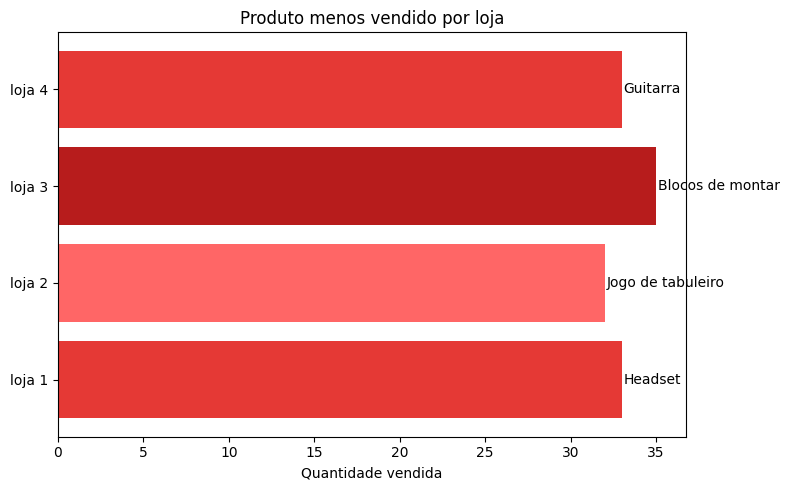

In [ ]:
import matplotlib.pyplot as plt

#grafico mais vendido
cores_mais = ['#66BB6A',
         '#1B5E20',
         '#A8E6A1',
         '#388E3C']
plt.figure(figsize=(8, 5))
plt.barh(tabela_produtos['loja'], tabela_produtos['qntd_mais'], color=cores_mais)
plt.title('Produto mais vendido por loja')
plt.xlabel('Quantidade vendida')

# nome dos produtos
for i, (quantidade, produto) in enumerate(zip(tabela_produtos['qntd_mais'], tabela_produtos['mais_vendido'])):
    plt.text(quantidade + 0.1, i, produto, va='center')

plt.tight_layout()
plt.show()

# grafico menos vendido
cores_menos = ['#E53935',  # vermelho bem claro
         '#FF6666',  # vermelho claro
         '#B71C1C',  # vermelho médio (tom padrão)
         '#E53935']  # vermelho escuro
plt.figure(figsize=(8, 5))
plt.barh(tabela_produtos['loja'], tabela_produtos['qntd_menos'], color=cores_menos)
plt.title('Produto menos vendido por loja')
plt.xlabel('Quantidade vendida')

# nome dos produtos na brra
for i, (quantidade, produto) in enumerate(zip(tabela_produtos['qntd_menos'], tabela_produtos['menos_vendido'])):
    plt.text(quantidade + 0.1, i, produto, va='center')

plt.tight_layout()
plt.show()